In [3]:
#import bibliotek
import pandas as pd
import numpy as np
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [4]:
#załadowanie danych
ufo = pd.read_csv('C:\\Users\\pawel\\OneDrive\\Pulpit\\csv\\complete.csv', on_bad_lines='skip')

In [5]:
#wyświetlenie kilku rekordów
ufo.head()

,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611


In [6]:
#sprawdzenie unikalnych wartości w kolumnie
ufo['comments'].unique()

array(['This event took place in early fall around 1949-50. It occurred after a Boy Scout meeting in the Baptist Church. The Baptist Church sit',
       '1949 Lackland AFB&#44 TX.  Lights racing across the sky &amp; making 90 degree turns on a dime.',
       'Green/Orange circular disc over Chester&#44 England', ...,
       '2 witnesses 2  miles apart&#44 Red &amp; White Elongated-Cigar Shaped Flashing lights&#44 NW of Oklahoma City',
       'On September ninth my wife and i noticed strange lights in the sky. Two white lights and a red light. I had noticed this the night befo',
       'Hovering object lit with red and white lights&#44 no engine sounds&#44 no directional movement.'],
      dtype=object)

In [7]:
#sprawdzenie kształtu danych
ufo.shape

(88679, 11)

In [8]:
#wyświetlenie informacji o danych
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88679 entries, 0 to 88678
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   datetime              88679 non-null  object 
 1   city                  88679 non-null  object 
 2   state                 81270 non-null  object 
 3   country               76314 non-null  object 
 4   shape                 85757 non-null  object 
 5   duration (seconds)    88677 non-null  object 
 6   duration (hours/min)  85660 non-null  object 
 7   comments              88644 non-null  object 
 8   date posted           88679 non-null  object 
 9   latitude              88679 non-null  object 
 10  longitude             88679 non-null  float64
dtypes: float64(1), object(10)
memory usage: 7.4+ MB


In [9]:
#sprawdzenie wartości nullowych
ufo.isnull().sum()

datetime                    0
city                        0
state                    7409
country                 12365
shape                    2922
duration (seconds)          2
duration (hours/min)     3019
comments                   35
date posted                 0
latitude                    0
longitude                   0
dtype: int64

In [10]:
# Usunięcie wierszy zawierających wartości NaN (brakujące dane) z ramki danych 'ufo'.
# Ta operacja pomaga w czyszczeniu danych przed analizą, eliminując wiersze, które nie posiadają pełnych informacji.
# Użycie inplace=True oznacza, że zmiany są dokonywane bezpośrednio w oryginalnej ramce danych 'ufo'.
ufo.dropna(inplace=True)


In [11]:
#zmiana nazw kolumn
ufo = ufo.rename(columns = {'duration (seconds)': 'duration_second',
            'duration (hours/min)': 'duration_min_hours',
            'date posted': 'date_posted'})

In [12]:
# Konwersja kolumny 'datetime' i 'date_posted' na format datetime, eliminując błędy (errors='coerce' -> nieprawidłowe daty zostaną zastąpione wartościami NULL).
ufo['datetime'] = pd.to_datetime(ufo['datetime'], errors='coerce')
ufo['date_posted'] = pd.to_datetime(ufo['date_posted'], errors='coerce')

In [13]:
# Sprawdzenie wartości nullowych
ufo.isnull().sum()

datetime              546
city                    0
state                   0
country                 0
shape                   0
duration_second         0
duration_min_hours      0
comments                0
date_posted             0
latitude                0
longitude               0
dtype: int64

In [14]:
ufo.dropna(inplace=True)

In [15]:
ufo.head()

,datetime,city,state,country,shape,duration_second,duration_min_hours,comments,date_posted,latitude,longitude
0,1949-10-10 20:30:00,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,2004-04-27,29.8830556,-97.941111
3,1956-10-10 21:00:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,2004-01-17,28.9783333,-96.645833
4,1960-10-10 20:00:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.4180556,-157.803611
5,1961-10-10 19:00:00,bristol,tn,us,sphere,300,5 minutes,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.5950000,-82.188889
7,1965-10-10 23:45:00,norwalk,ct,us,disk,1200,20 minutes,A bright orange color changing to reddish colo...,1999-10-02,41.1175000,-73.408333


In [16]:
# Zmiana wszystkich liter w kolumnie 'state' na duże litery
ufo['state'] = ufo['state'].str.upper()

In [17]:
ufo['country'] = ufo['country'].str.upper()

In [18]:
#konwersja typów
ufo['latitude'] = ufo['latitude'].astype('float64')
ufo['duration_second'] = ufo['duration_second'].astype('float64')

In [19]:
top_10_times = ufo['datetime'].value_counts().head(10)

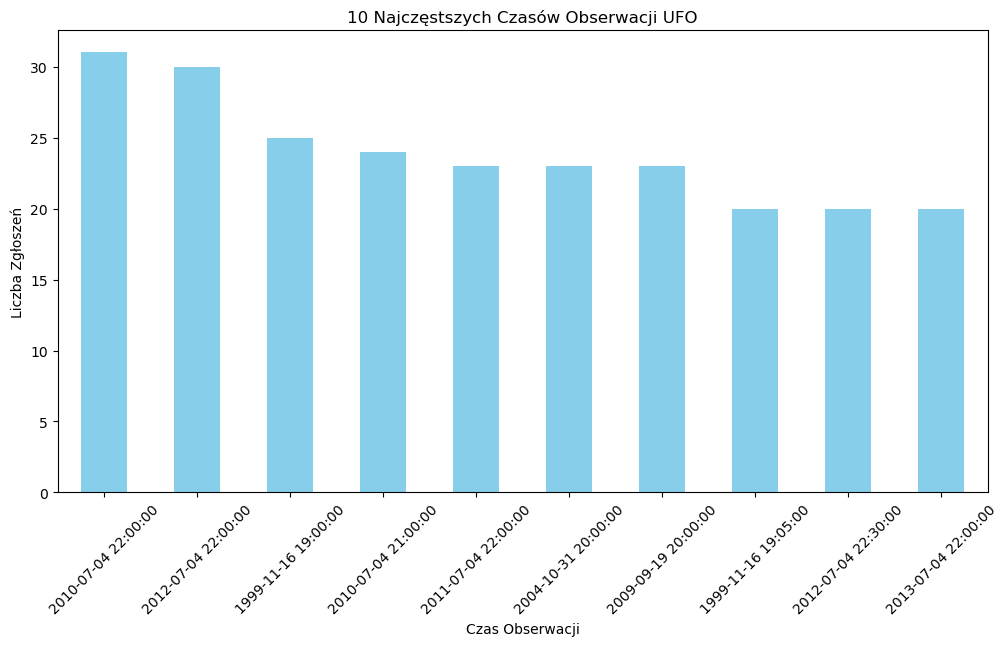

In [21]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
top_10_times.plot(kind='bar', color='skyblue')
plt.title('10 Najczęstszych Czasów Obserwacji UFO')
plt.xlabel('Czas Obserwacji')
plt.ylabel('Liczba Zgłoszeń')
plt.xticks(rotation=45)
plt.show()

In [22]:
#zmiana wszystkich liter w rekordach w kolumnie shape na małe 
ufo['shape'] = ufo['shape'].str.lower()

In [23]:
#zliczenie częstości wystepowania kształtów ufo
shape_counts = ufo['shape'].value_counts()

In [27]:
#reset indexu oraz przekształcenie go na listę
shape_counts = shape_counts.reset_index()
shape_counts_list = list(shape_counts['index'])

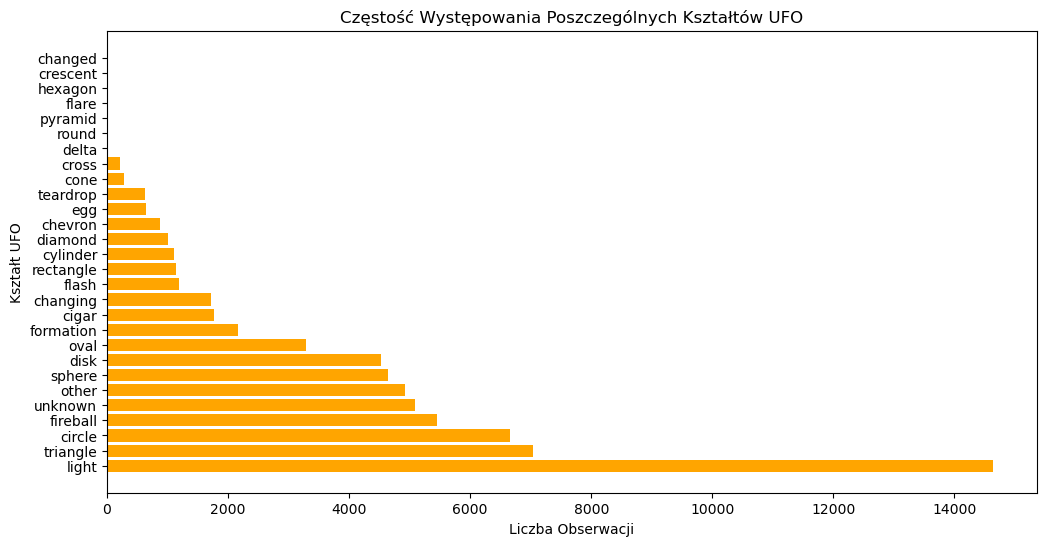

In [31]:
plt.figure(figsize=(12, 6))
plt.barh(shape_counts_list, shape_counts['shape'], color='orange')  
plt.title('Częstość Występowania Poszczególnych Kształtów UFO')
plt.xlabel('Liczba Obserwacji')
plt.ylabel('Kształt UFO')
plt.show()

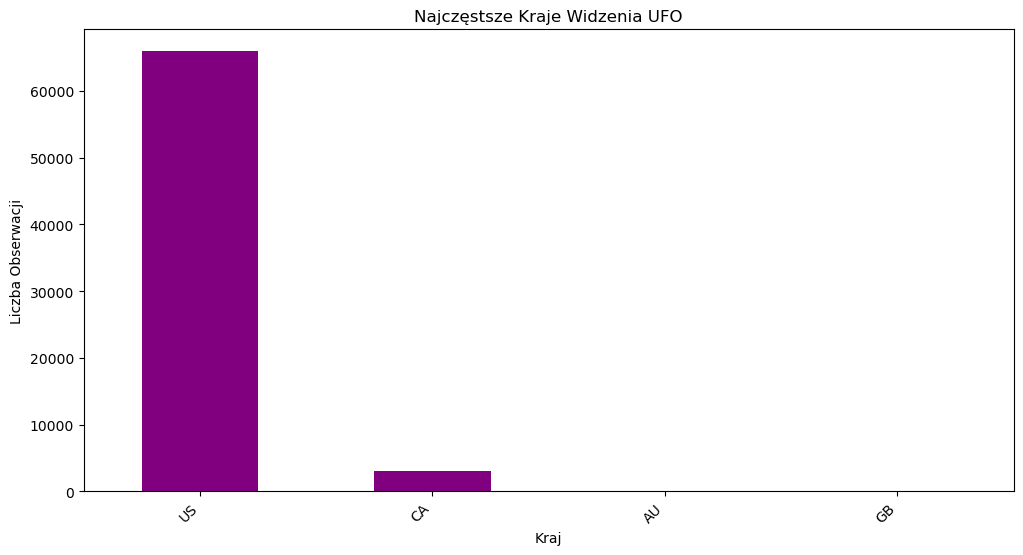

In [32]:
country_counts = ufo['country'].value_counts().head(10)
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar', color='purple')
plt.title('Najczęstsze Kraje Widzenia UFO')
plt.xlabel('Kraj')
plt.ylabel('Liczba Obserwacji')
plt.xticks(rotation=45, ha='right')  # Rotacja etykiet osi X
plt.show()

In [33]:
ufo['city_state'] = ufo['city'] + ', ' + ufo['state']

In [34]:
city_state_counts = ufo['city_state'].value_counts().head(10)

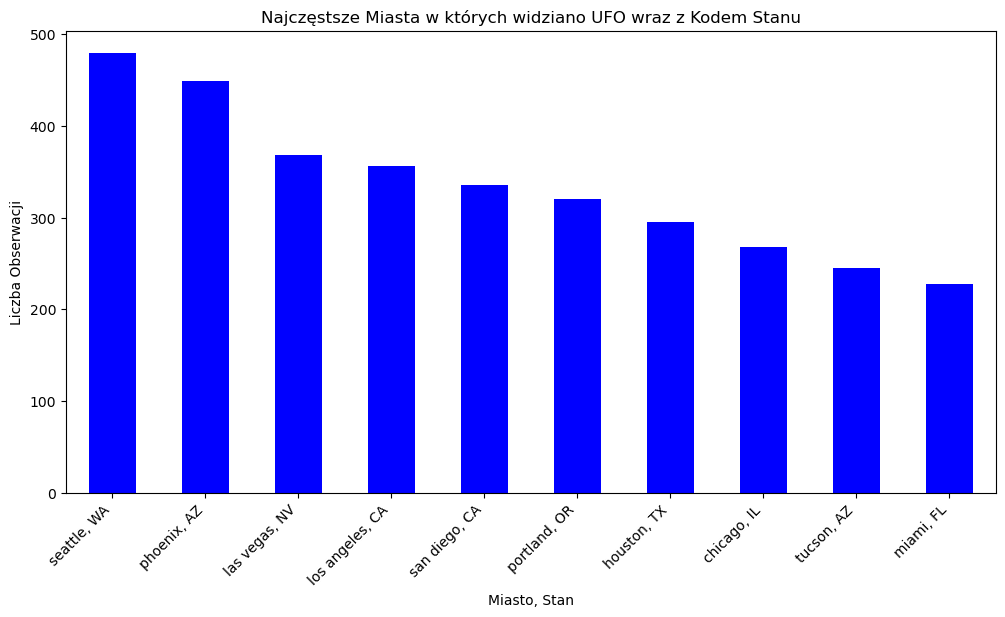

In [36]:
plt.figure(figsize=(12, 6))
city_state_counts.plot(kind='bar', color='blue')
plt.title('Najczęstsze Miasta w których widziano UFO wraz z Kodem Stanu')
plt.xlabel('Miasto, Stan')
plt.ylabel('Liczba Obserwacji')
plt.xticks(rotation=45, ha='right')  # Rotacja etykiet osi X
plt.show()

In [38]:
#stworzenie nowych kolumn, pętla przeliczająca czs z kolumny duration (seconds)
ufo['duration (minutes)'] = np.nan
ufo['duration (hours)'] = np.nan
for i in range(len(ufo['duration_second'])):
    try:
        ufo['duration (minutes)'].iloc[i] = float(ufo['duration_second'].iloc[i]) / 60
        ufo['duration (hours)'].iloc[i] = float(ufo['duration_second'].iloc[i]) / 3600
    except:
        # w przypadku błedu usuń wszystkie znaki oprócz cyfr i kropek
        ufo['duration (seconds)'].iloc[i] = re.sub(r"[^0-9.]", "", ufo['duration_second'].iloc[i])
        ufo['duration (minutes)'].iloc[i] = float(ufo['duration_second'].iloc[i]) / 60
        ufo['duration (hours)'].iloc[i] = float(ufo['duration_second'].iloc[i]) / 3600

In [39]:
print(ufo['duration (minutes)'].isnull().sum())
print(ufo['duration (hours)'].isnull().sum())

0
0


In [40]:
#usunięcie kolumny
ufo = ufo.drop(['duration_min_hours'], axis=1)

In [41]:
ufo.head()

,datetime,city,state,country,shape,duration_second,comments,date_posted,latitude,longitude,city_state,duration (minutes),duration (hours)
0,1949-10-10 20:30:00,san marcos,TX,US,cylinder,2700.0,This event took place in early fall around 194...,2004-04-27,29.883056,-97.941111,"san marcos, TX",45.000000,0.750000
3,1956-10-10 21:00:00,edna,TX,US,circle,20.0,My older brother and twin sister were leaving ...,2004-01-17,28.978333,-96.645833,"edna, TX",0.333333,0.005556
4,1960-10-10 20:00:00,kaneohe,HI,US,light,900.0,AS a Marine 1st Lt. flying an FJ4B fighter/att...,2004-01-22,21.418056,-157.803611,"kaneohe, HI",15.000000,0.250000
5,1961-10-10 19:00:00,bristol,TN,US,sphere,300.0,My father is now 89 my brother 52 the girl wit...,2007-04-27,36.595000,-82.188889,"bristol, TN",5.000000,0.083333
7,1965-10-10 23:45:00,norwalk,CT,US,disk,1200.0,A bright orange color changing to reddish colo...,1999-10-02,41.117500,-73.408333,"norwalk, CT",20.000000,0.333333


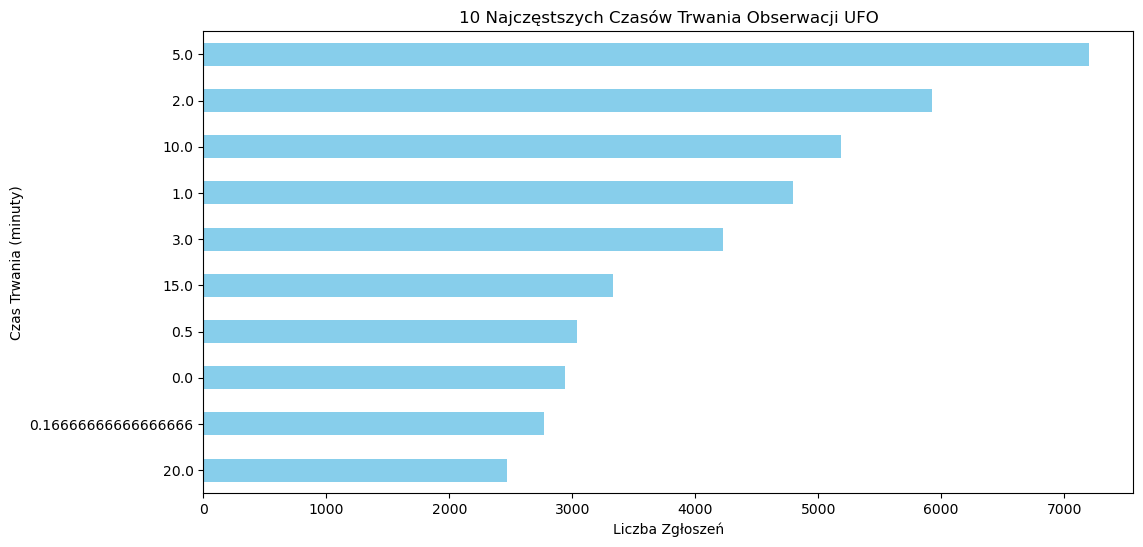

In [42]:
top10_durations = ufo['duration (minutes)'].value_counts().head(10)
plt.figure(figsize=(12, 6))
top10_durations.sort_values().plot(kind='barh', color='skyblue')
plt.title('10 Najczęstszych Czasów Trwania Obserwacji UFO')
plt.xlabel('Liczba Zgłoszeń')
plt.ylabel('Czas Trwania (minuty)')
plt.show()

In [43]:
#zapis danych do pliku
path = 'C:\\Users\\pawel\\OneDrive\\Pulpit\\csv\\oczyszczone_dane.csv'
ufo.to_csv(path, index=False)